In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
def create_model(initializer=None, dropout_rate=0, regularization=None):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(32, 32, 3)))

    for _ in range(3):
        model.add(layers.Dense(125, activation='relu', kernel_initializer=initializer,
                               kernel_regularizer=regularization))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(10, activation='softmax'))
    return model


In [ ]:
import time

def compile_and_train_model(model, optimizer, epochs=4):
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
    end_time = time.time()

    training_time = end_time - start_time
    return history, training_time



In [ ]:
def plot_history(histories, titles):
    for history, title in zip(histories, titles):
        plt.plot(history.history['accuracy'], label=f'{title} Training Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{title} Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'{title} Accuracy')
        plt.legend()
        plt.show()

        plt.plot(history.history['loss'], label=f'{title} Training Loss')
        plt.plot(history.history['val_loss'], label=f'{title} Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'{title} Loss')
        plt.legend()
        plt.show()

In [ ]:
baseline_model = create_model()
baseline_history, baseline_time = compile_and_train_model(baseline_model, optimizer='adam')

xavier_model = create_model(initializer='glorot_uniform')
xavier_history, xavier_time = compile_and_train_model(xavier_model, optimizer='adam')

kaiming_model = create_model(initializer='he_normal')
kaiming_history, kaiming_time = compile_and_train_model(kaiming_model, optimizer='adam')

dropout_model = create_model(dropout_rate=0.5)
dropout_history, dropout_time = compile_and_train_model(dropout_model, optimizer='adam')

l2_model = create_model(regularization=regularizers.l2(0.01))
l2_history, l2_time = compile_and_train_model(l2_model, optimizer='adam')

NameError: name 'create_model' is not defined

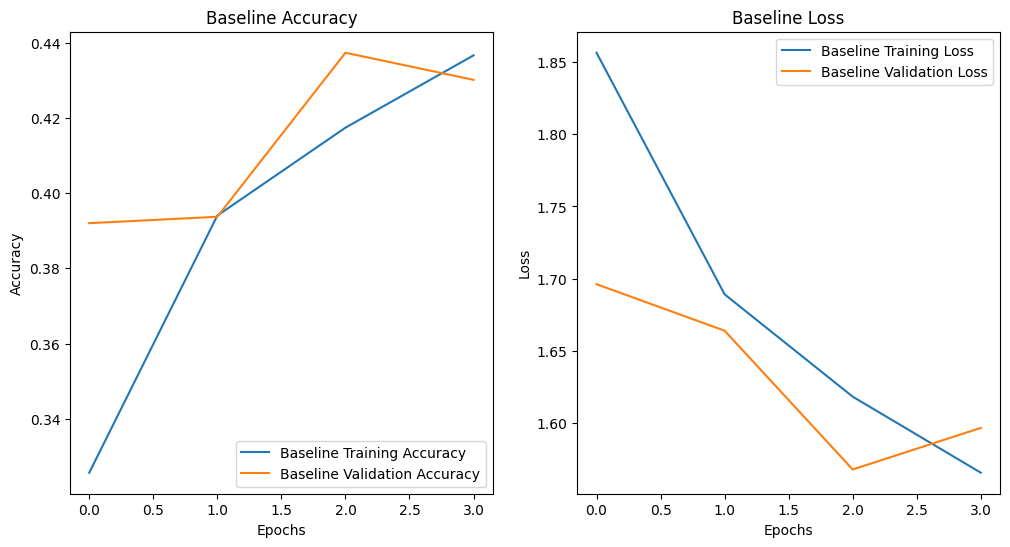

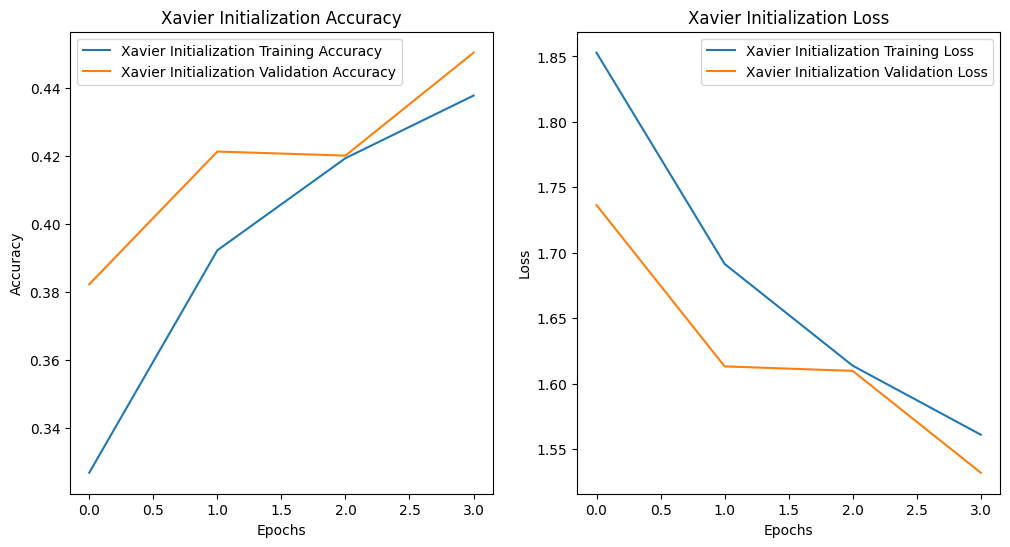

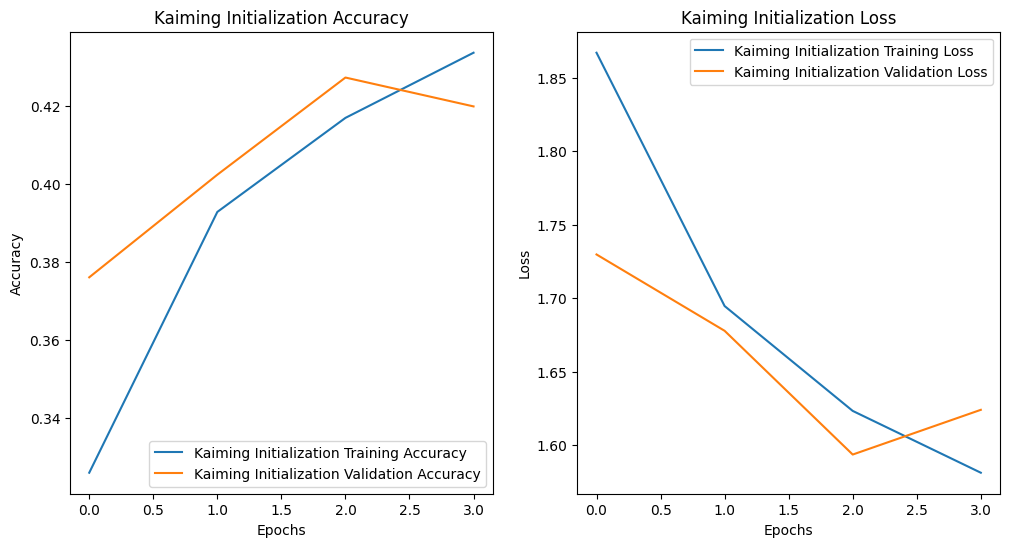

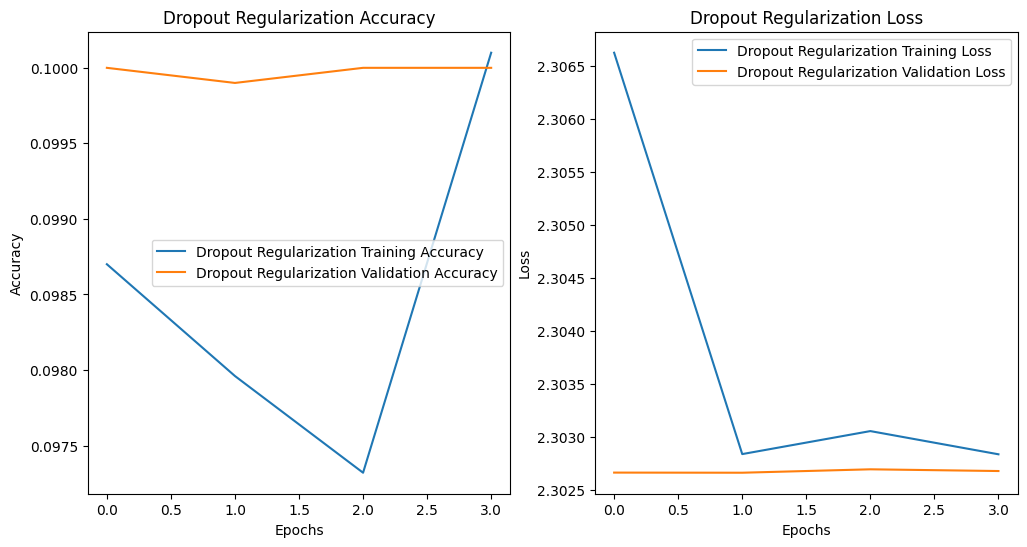

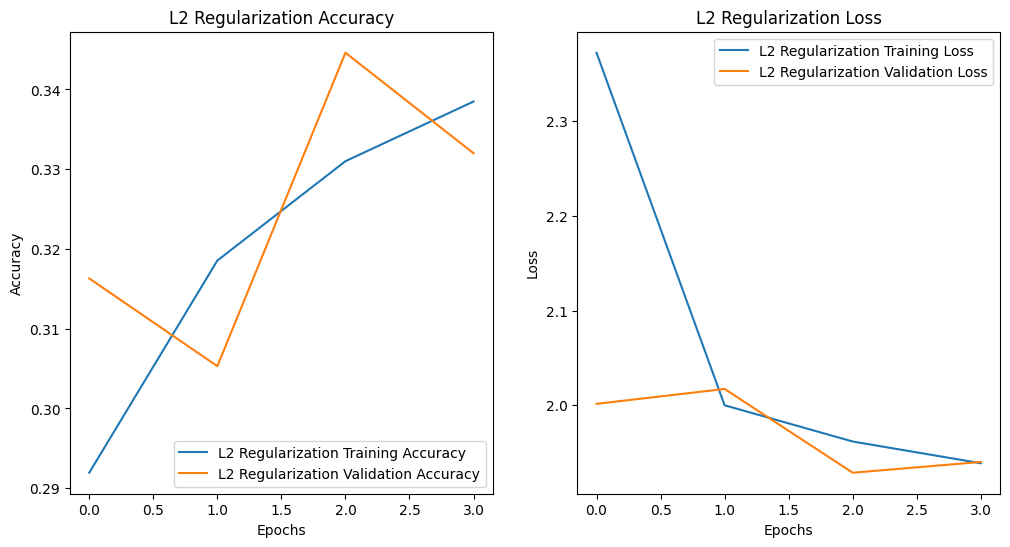

Baseline Training Time: 41.65 seconds
Xavier Initialization Training Time: 41.86 seconds
Kaiming Initialization Training Time: 52.12 seconds
Dropout Regularization Training Time: 54.36 seconds
L2 Regularization Training Time: 75.52 seconds


In [ ]:
histories = [baseline_history, xavier_history, kaiming_history, dropout_history, l2_history]
training_times = [baseline_time, xavier_time, kaiming_time, dropout_time, l2_time]

# Plot accuracy and loss
def plot_history(histories, titles):
    for history, title in zip(histories, titles):
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label=f'{title} Training Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{title} Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'{title} Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label=f'{title} Training Loss')
        plt.plot(history.history['val_loss'], label=f'{title} Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'{title} Loss')
        plt.legend()

        plt.show()

plot_history(
    histories=histories,
    titles=['Baseline', 'Xavier Initialization', 'Kaiming Initialization', 'Dropout Regularization', 'L2 Regularization']
)

# Print training times
for title, time in zip(['Baseline', 'Xavier Initialization', 'Kaiming Initialization', 'Dropout Regularization', 'L2 Regularization'], training_times):
    print(f'{title} Training Time: {time:.2f} seconds')


**Exp 4**


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
model = models.Sequential([
    layers.Conv2D(filters=55, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=74, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=4, validation_split=0.1)

Epoch 1/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.8543 - loss: 0.4652 - val_accuracy: 0.9760 - val_loss: 0.0799
Epoch 2/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.9756 - loss: 0.0757 - val_accuracy: 0.9845 - val_loss: 0.0513
Epoch 3/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.9830 - loss: 0.0535 - val_accuracy: 0.9807 - val_loss: 0.0606
Epoch 4/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 139s 47ms/step - accuracy: 0.9864 - loss: 0.0421 - val_accuracy: 0.9810 - val_loss: 0.0633


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9804 - loss: 0.0690
Test accuracy: 0.9842000007629395


In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
print(f'Prediction for the first image: {y_pred_labels[0]}')

Prediction for the first image: 7


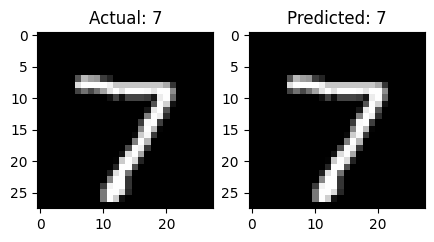

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f'Actual: {y_test[0]}')


plt.subplot(1, 2, 2)
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {y_pred_labels[0]}')

plt.show()


Experiment 8

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Expand dimensions to add channels
x_train = np.expand_dims(x_train, axis=-1)  # (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)    # (10000, 28, 28, 1)

# Resize the images to 32x32
x_train = tf.image.resize(x_train, [32, 32])
x_test = tf.image.resize(x_test, [32, 32])

# Convert to 3 channels by repeating the grayscale channel
x_train = np.repeat(x_train.numpy(), 3, axis=-1)  # (60000, 32, 32, 3)
x_test = np.repeat(x_test.numpy(), 3, axis=-1)    # (10000, 32, 32, 3)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:

base_model = applications.VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

base_model.trainable = False


model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

history = model.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test))


938/938 ━━━━━━━━━━━━━━━━━━━━ 972s 1s/step - accuracy: 0.7673 - loss: 0.7541 - val_accuracy: 0.9509 - val_loss: 0.1616


313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 456ms/step - accuracy: 0.9446 - loss: 0.1774
Test Accuracy: 0.9509


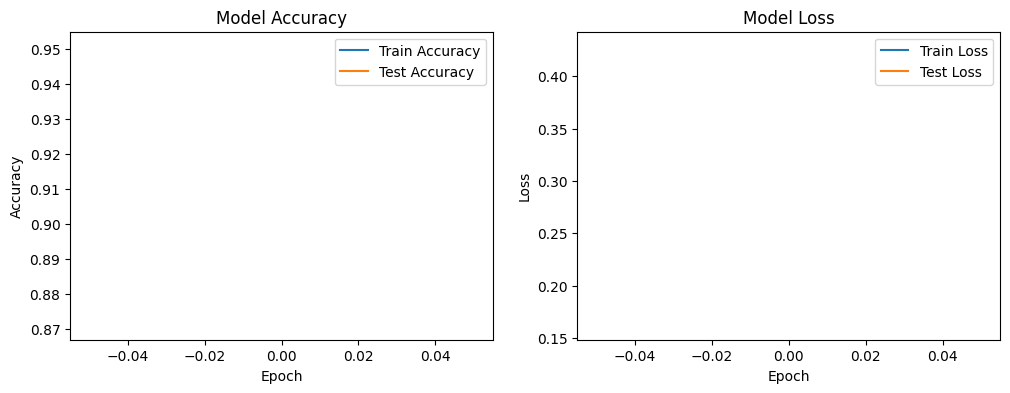

In [ ]:

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
